# Projet INTELIGENCE ARTIFICIELLE
# MALLAT Amira 

## 1/ Chargement de la base de données


In [1]:
import numpy as np 
np.set_printoptions (suppress=True) 
import pandas as pd  
import warnings 
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore') 

In [2]:
scor=pd.read_csv('./credit_scoring.csv',sep=';', header=(0) )

In [3]:
scor.head(20)

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1
5,1.0,0.0,60.0,36.0,0.0,1.0,0.0,75.0,214.0,3500.0,0.0,650.0,1645.0,1
6,29.0,0.0,60.0,44.0,0.0,1.0,0.0,75.0,125.0,10000.0,0.0,1600.0,1800.0,1
7,9.0,1.0,12.0,27.0,1.0,1.0,0.0,35.0,80.0,0.0,0.0,200.0,1093.0,1
8,0.0,0.0,60.0,32.0,0.0,1.0,1.0,90.0,107.0,15000.0,0.0,1200.0,1957.0,1
9,0.0,1.0,48.0,41.0,0.0,1.0,1.0,90.0,80.0,0.0,0.0,1200.0,1468.0,0


In [4]:
type(scor)

pandas.core.frame.DataFrame

In [5]:
scor.shape

(4375, 14)

## 2/ Definition des Attributs et des classes

In [6]:
# X : Les Attributs
# Y : Les classes

X= scor.iloc[:,0:13].values
Y= scor.iloc[:,13].values

In [7]:
from collections import Counter
histogram=Counter(Y)
print(histogram)

Counter({1: 3159, 0: 1216})


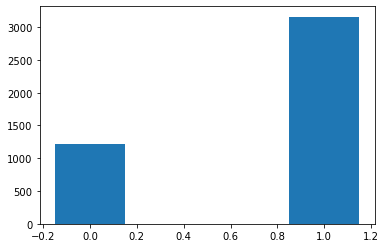

In [8]:
plt.bar(histogram.keys(),histogram.values(), 0.3)
plt.show()

In [9]:
ep=np.sum(Y==1)/len(Y) 
nep=np.sum(Y==0)/len(Y)
print('Exicted : {0:.3f} et Non : {1:.3f}'.format(ep,nep))

Exicted : 0.722 et Non : 0.278


## 3/ Separation de la base de données

In [10]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.25,random_state=1)
print(Xtrain.shape)
print(Xtest.shape)

(3281, 13)
(1094, 13)


In [11]:
print(Ytrain.shape)
print(Ytest.shape)

(3281,)
(1094,)


In [12]:
print(Xtrain)

[[   1.    1.   60. ...    0. 2400. 2599.]
 [  15.    0.   48. ...    0. 1200. 1290.]
 [  31.    1.   60. ...    0. 1050. 1182.]
 ...
 [  11.    1.   12. ...    0.  300. 1479.]
 [   0.    1.   48. ...    0.  600. 1452.]
 [   1.    1.   36. ...    0. 1200. 2186.]]


In [13]:
print(Ytrain)

[0 1 1 ... 1 0 1]


In [14]:
pd.options.display.float_format = '{:,.4f}'.format

### Statistiques sur la base de données
### corélation des vecteurs

In [15]:
scor.corr()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
Seniority,1.0000,-0.2348,-0.0184,0.5084,-0.2350,-0.0180,-0.1629,0.1252,0.1344,0.1475,-0.0162,-0.0120,0.0368,0.2638
Home,-0.2348,1.0000,0.0228,-0.2935,0.3106,0.0318,-0.0100,-0.0491,-0.1313,-0.2969,-0.1874,-0.0348,-0.1024,-0.2102
Time,-0.0184,0.0228,1.0000,-0.0524,-0.0321,0.0283,-0.1327,-0.0021,-0.0136,-0.0800,0.0616,0.4400,0.1343,-0.1064
Age,0.5084,-0.2935,-0.0524,1.0000,-0.3704,0.0588,0.0705,0.2459,0.1175,0.2075,-0.0516,0.0243,0.0454,0.1005
Marital,-0.2350,0.3106,-0.0321,-0.3704,1.0000,-0.0329,0.0141,-0.5087,-0.1324,-0.0769,-0.0496,-0.0621,-0.0940,-0.0922
Records,-0.0180,0.0318,0.0283,0.0588,-0.0329,1.0000,0.0249,0.0534,0.0215,0.0188,0.0165,0.1067,0.0794,-0.2767
Job,-0.1629,-0.0100,-0.1327,0.0705,0.0141,0.0249,1.0000,0.0038,-0.1469,0.1712,0.0195,0.0413,0.0296,-0.2091
Expenses,0.1252,-0.0491,-0.0021,0.2459,-0.5087,0.0534,0.0038,1.0000,0.2416,0.0168,0.0145,0.0450,0.0395,-0.0297
Income,0.1344,-0.1313,-0.0136,0.1175,-0.1324,0.0215,-0.1469,0.2416,1.0000,0.1468,0.1059,0.1401,0.1675,0.2059
Assets,0.1475,-0.2969,-0.0800,0.2075,-0.0769,0.0188,0.1712,0.0168,0.1468,1.0000,0.1849,0.1551,0.2173,0.1071


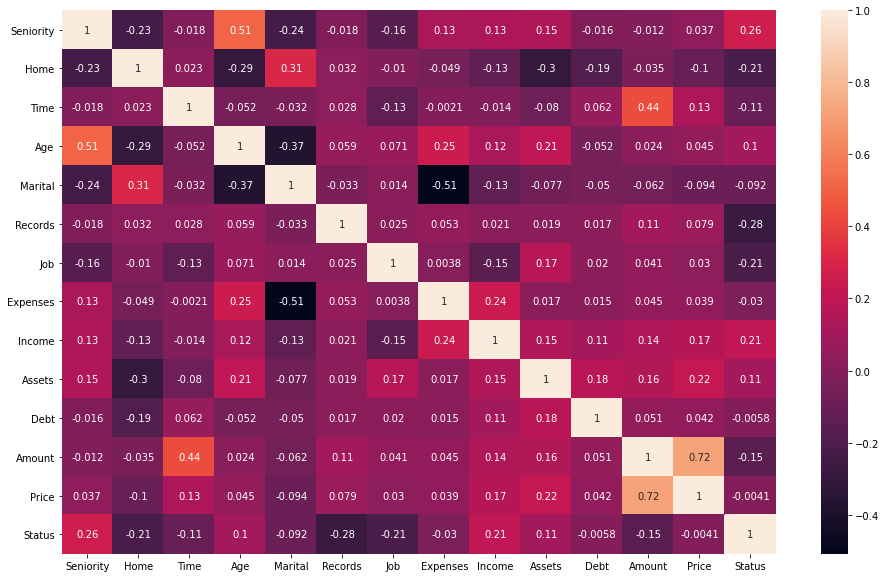

In [16]:
import seaborn as sns;
plt.figure(figsize=(16,10))
sns.heatmap(scor.corr(), annot=True)
plt.show()

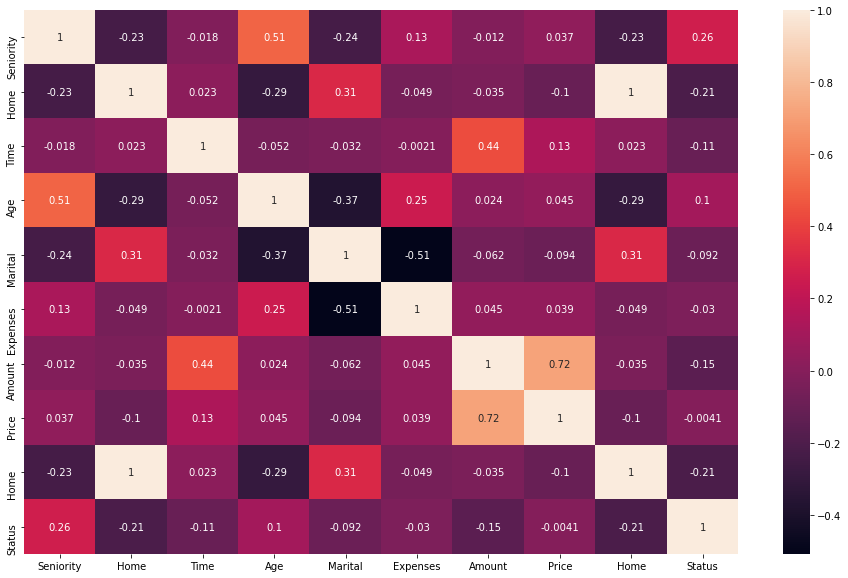

In [17]:
plt.figure(figsize=(16,10))
sns.heatmap(scor[['Seniority','Home','Time','Age','Marital','Expenses','Amount','Price','Home','Status']].corr(), annot=True)
plt.show()

In [18]:

## 4-5/ Apprentissage et Test de modeles (par L'arbre de décision)



In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
 
from sklearn.tree import DecisionTreeClassifier

def ClassifeurExcited (Xtrain,Xtest,Ytrain,Ytest):
    print('DecisionTreeClassifier') 
    DT=DecisionTreeClassifier(random_state=0,criterion='entropy')    

    DT.fit(Xtrain,Ytrain) 
    YDT=DT.predict(Xtest)
    
    print ('Accuracy = {0:3f}, recall = {1:.3f}'.format(accuracy_score(Ytest,YDT),recall_score(Ytest,YDT)))
    acc1=accuracy_score(Ytest,YDT)
    pre1=recall_score(Ytest,YDT)
    score1=(acc1+pre1)/2
    print()
    print('------------> score 1 = {0:3f}'.format(score1))
    print()
    print('matrice de confusion')
    print(confusion_matrix(Ytest, YDT))
    print()
    

###  Normalisation des données
###  Matrice de confusion
 

In [20]:
ss = StandardScaler()
ss.fit(Xtrain)
Xtrain_norm = ss.transform(Xtrain)
Xtest_norm = ss.transform(Xtest)
ClassifeurExcited( Xtrain, Xtest, Ytrain, Ytest)

DecisionTreeClassifier
Accuracy = 0.714808, recall = 0.788

------------> score 1 = 0.751419

matrice de confusion
[[150 142]
 [170 632]]



## 6/ Evaluation des performance et interprétation 

In [21]:
np.corrcoef(scor)

array([[1.        , 0.97092327, 0.69017641, ..., 0.14308904, 0.99676912,
        0.3130868 ],
       [0.97092327, 1.        , 0.71300839, ..., 0.16856603, 0.95767971,
        0.32456976],
       [0.69017641, 0.71300839, 1.        , ..., 0.80864871, 0.67560931,
        0.87478522],
       ...,
       [0.14308904, 0.16856603, 0.80864871, ..., 1.        , 0.13269568,
        0.95375965],
       [0.99676912, 0.95767971, 0.67560931, ..., 0.13269568, 1.        ,
        0.30141782],
       [0.3130868 , 0.32456976, 0.87478522, ..., 0.95375965, 0.30141782,
        1.        ]])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier


In [23]:

Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.25,random_state=1)

In [24]:
def ClassifieurExcited(Xtrain,Xtest,Ytrain,Ytest):
    print('DecisionTreeClassifier') 
    DT=DecisionTreeClassifier(random_state=0, criterion='entropy')
    DT.fit(Xtrain,Ytrain)
    YDT=DT.predict(Xtest)

    print('Accuracy = {0:.3f}, Recall = {1:.3f}'.format(accuracy_score(Ytest,YDT), recall_score(Ytest,YDT)))
    acc1=accuracy_score(Ytest,YDT)
    rec1=recall_score(Ytest,YDT)
    score1=(acc1+rec1)/2
    print()
    print('--> Score 1 = {0:.3f}'.format(score1))
    print()
    print('Matrice de confision')
    print(confusion_matrix(Ytest, YDT))
    print()
    print('###################################')

    print('RandomForestClassifier') 
    RF=RandomForestClassifier(n_estimators=100, random_state=1)

    RF.fit(Xtrain,Ytrain)
    YRF=RF.predict(Xtest)

    print('Accuracy = {0:.3f}, Recall = {1:.3f}'.format(accuracy_score(Ytest,YRF), recall_score(Ytest,YRF)))
    acc2=accuracy_score(Ytest,YRF)
    rec2=recall_score(Ytest,YRF)
    score2=(acc2+rec2)/2
    print()
    print('--> Score 2 = {0:.3f}'.format(score2))
    print()
    print('Matrice de confision')
    print(confusion_matrix(Ytest, YRF))
    print()
    print('###########################')



    print('MLPClassifier')
    ML=MLPClassifier(hidden_layer_sizes=(20,10),alpha=0.001, max_iter=200)

    ML.fit(Xtrain,Ytrain)
    YML=ML.predict(Xtest)

    print('Accuracy = {0:.3f}, Recall = {1:.3f}'.format(accuracy_score(Ytest,YML), recall_score(Ytest,YML)))
    acc3=accuracy_score(Ytest,YML)
    rec3=recall_score(Ytest,YML)
    score3=(acc3+rec3)/2
    print()
    print('--> Score 3 = {0:.3f}'.format(score3))
    print()
    print('Matrice de confision')
    print(confusion_matrix(Ytest, YML))
    print()
    print('###########################')





    print('AdaBoostClassifier')
    AdaC=AdaBoostClassifier(n_estimators=100, random_state=0)

    AdaC.fit(Xtrain,Ytrain)
    AdaC.feature_importances_
    YAdaC=AdaC.predict(Xtest)

    print('Accuracy = {0:.3f}, Recall = {1:.3f}'.format(accuracy_score(Ytest,YAdaC), recall_score(Ytest,YAdaC)))
    acc4=accuracy_score(Ytest,YAdaC)
    rec4=recall_score(Ytest,YAdaC)
    score4=(acc4+rec4)/2
    print()
    print('--> Score 4 = {0:.3f}'.format(score4))
    print()
    print('Matrice de confision')
    print(confusion_matrix(Ytest, YAdaC))
    print()



In [25]:
ClassifieurExcited(Xtrain,Xtest,Ytrain,Ytest)

DecisionTreeClassifier
Accuracy = 0.715, Recall = 0.788

--> Score 1 = 0.751

Matrice de confision
[[150 142]
 [170 632]]

###################################
RandomForestClassifier
Accuracy = 0.785, Recall = 0.893

--> Score 2 = 0.839

Matrice de confision
[[143 149]
 [ 86 716]]

###########################
MLPClassifier
Accuracy = 0.761, Recall = 0.882

--> Score 3 = 0.821

Matrice de confision
[[126 166]
 [ 95 707]]

###########################
AdaBoostClassifier
Accuracy = 0.797, Recall = 0.890

--> Score 4 = 0.844

Matrice de confision
[[158 134]
 [ 88 714]]



In [26]:
#importation des standars de normalisation
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [27]:
ss=StandardScaler()
ss.fit(Xtrain)
Xtrain_norm=ss.transform(Xtrain)
Xtest_norm=ss.transform(Xtest)

In [28]:
ClassifieurExcited (Xtrain_norm,Xtest_norm,Ytrain,Ytest)

DecisionTreeClassifier
Accuracy = 0.719, Recall = 0.788

--> Score 1 = 0.754

Matrice de confision
[[155 137]
 [170 632]]

###################################
RandomForestClassifier
Accuracy = 0.787, Recall = 0.893

--> Score 2 = 0.840

Matrice de confision
[[145 147]
 [ 86 716]]

###########################
MLPClassifier
Accuracy = 0.787, Recall = 0.869

--> Score 3 = 0.828

Matrice de confision
[[164 128]
 [105 697]]

###########################
AdaBoostClassifier
Accuracy = 0.797, Recall = 0.890

--> Score 4 = 0.844

Matrice de confision
[[158 134]
 [ 88 714]]



In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
parametres={'n_estimators':[100,200,300,400,500,600,700,800,900]}
#Tester toutes les possibilités dans l'algorithme choisi

In [31]:
model=AdaBoostClassifier()
GS=GridSearchCV(model, parametres, cv=5, scoring='accuracy')


In [32]:
GS.fit(Xtrain,Ytrain)
GS.best_params_

{'n_estimators': 100}

In [33]:
from sklearn.decomposition import PCA

In [34]:
from sklearn.pipeline import Pipeline 
import pickle 
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()


In [35]:
pca=PCA(n_components=3)
pca.fit(Xtrain)
Xtrain_pca=pca.transform(Xtrain)
Xtest_pca=pca.transform(Xtest)
Xtrain_pca=np.concatenate((Xtrain,Xtrain_pca),axis=1)
Xtest_pca=np.concatenate((Xtest,Xtest_pca),axis=1)


In [36]:
ClassifieurExcited(Xtrain_pca,Xtest_pca,Ytrain,Ytest)

DecisionTreeClassifier
Accuracy = 0.714, Recall = 0.789

--> Score 1 = 0.752

Matrice de confision
[[148 144]
 [169 633]]

###################################
RandomForestClassifier
Accuracy = 0.789, Recall = 0.893

--> Score 2 = 0.841

Matrice de confision
[[147 145]
 [ 86 716]]

###########################
MLPClassifier
Accuracy = 0.768, Recall = 0.868

--> Score 3 = 0.818

Matrice de confision
[[144 148]
 [106 696]]

###########################
AdaBoostClassifier
Accuracy = 0.793, Recall = 0.889

--> Score 4 = 0.841

Matrice de confision
[[154 138]
 [ 89 713]]



In [37]:

P=Pipeline([
            ('ss', StandardScaler()),
            ('FU', FeatureUnion([('ss', StandardScaler()),
                                 ('pca', PCA(n_components=3))])),
            ('AD', AdaBoostClassifier(n_estimators=100))
])
P.fit(X,Y)
pickle.dump(P,open('MonClassifieur.pkl','wb'))